In [20]:
!pip install pandas matplotlib seaborn pyarrow s3fs awswrangler


In [21]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.dataset as ds
from pyarrow import fs
import awswrangler as wr


In [22]:
bucket_name = 'p3-tet'  # Reemplaza con el nombre de tu bucket
trusted_data_prefix = 'trusted/'
s3_path = f's3://{bucket_name}/{trusted_data_prefix}'


In [23]:
df = wr.s3.read_parquet(path=s3_path)


In [24]:
print(df.head())
print(df.shape)


  fecha_reporte_web  id_caso fecha_notificacion  codigo_divipola_departamento  \
0        2020-06-03        1         2020-02-03                            11   
1        2020-09-03        2         2020-06-03                            76   
2        2020-09-03        3         2020-07-03                             5   
3        2020-11-03        4         2020-09-03                             5   
4        2020-11-03        5         2020-09-03                             5   

  nombre_departamento  codigo_divipola_municipio nombre_municipio  Edad  \
0              BOGOTA                      11001           BOGOTA    19   
1               VALLE                      76111             BUGA    34   
2           ANTIOQUIA                       5001         MEDELLIN    50   
3           ANTIOQUIA                       5001         MEDELLIN    55   
4           ANTIOQUIA                       5001         MEDELLIN    25   

   unidad_medida_edad Sexo  ... codigo_iso_pais nombre_pais  R

In [25]:
df.head()

,fecha_reporte_web,id_caso,fecha_notificacion,codigo_divipola_departamento,nombre_departamento,codigo_divipola_municipio,nombre_municipio,Edad,unidad_medida_edad,Sexo,...,codigo_iso_pais,nombre_pais,Recuperado,fecha_inicio_sintomas,fecha_muerte,fecha_diagnostico,fecha_recuperacion,tipo_recuperacion,pertenencia_etnica,nombre_grupo_etnico
0,2020-06-03,1,2020-02-03,11,BOGOTA,11001,BOGOTA,19,1,F,...,380,ITALIA,Recuperado,None,None,2020-06-03,None,PCR,6,<NA>
1,2020-09-03,2,2020-06-03,76,VALLE,76111,BUGA,34,1,M,...,724,ESPAÑA,Recuperado,2020-04-03,None,2020-09-03,None,PCR,5,<NA>
2,2020-09-03,3,2020-07-03,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724,ESPAÑA,Recuperado,None,None,2020-09-03,None,PCR,6,<NA>
3,2020-11-03,4,2020-09-03,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,<NA>,<NA>,Recuperado,2020-06-03,None,2020-11-03,None,PCR,6,<NA>
4,2020-11-03,5,2020-09-03,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,<NA>,<NA>,Recuperado,2020-08-03,None,2020-11-03,None,PCR,6,<NA>


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   fecha_reporte_web             27428 non-null   object
 1   id_caso                       101000 non-null  Int32 
 2   fecha_notificacion            34589 non-null   object
 3   codigo_divipola_departamento  101000 non-null  Int32 
 4   nombre_departamento           101000 non-null  string
 5   codigo_divipola_municipio     101000 non-null  Int32 
 6   nombre_municipio              101000 non-null  string
 7   Edad                          101000 non-null  Int32 
 8   unidad_medida_edad            101000 non-null  Int32 
 9   Sexo                          101000 non-null  string
 10  tipo_contagio                 101000 non-null  string
 11  ubicacion_caso                101000 non-null  string
 12  Estado                        101000 non-null  string
 13 

In [27]:
df.describe()

,id_caso,codigo_divipola_departamento,codigo_divipola_municipio,Edad,unidad_medida_edad,codigo_iso_pais,pertenencia_etnica
count,101000.0,101000.0,101000.0,101000.0,101000.0,1389.0,101000.0
mean,49548.270842,2618.441495,25363.589693,39.329733,1.006317,611.381569,5.580129
std,29142.999992,6168.523364,25842.22669,18.407749,0.088551,244.633567,1.17897
min,1.0,5.0,5001.0,1.0,1.0,32.0,1.0
25%,24290.75,11.0,8758.0,26.0,1.0,484.0,6.0
50%,49540.5,25.0,11001.0,36.0,1.0,724.0,6.0
75%,74790.25,76.0,27001.0,52.0,1.0,826.0,6.0
max,100040.0,47001.0,99001.0,104.0,3.0,862.0,6.0


In [28]:
df.isnull().sum()


fecha_reporte_web               73572
id_caso                             0
fecha_notificacion              66411
codigo_divipola_departamento        0
nombre_departamento                 0
codigo_divipola_municipio           0
nombre_municipio                    0
Edad                                0
unidad_medida_edad                  0
Sexo                                0
tipo_contagio                       0
ubicacion_caso                      0
Estado                              0
codigo_iso_pais                 99611
nombre_pais                     99611
Recuperado                          0
fecha_inicio_sintomas           64389
fecha_muerte                    98840
fecha_diagnostico               73778
fecha_recuperacion              64324
tipo_recuperacion                5218
pertenencia_etnica                  0
nombre_grupo_etnico             95328
dtype: int64

In [30]:
print(df.columns)



Index(['fecha_reporte_web', 'id_caso', 'fecha_notificacion',
       'codigo_divipola_departamento', 'nombre_departamento',
       'codigo_divipola_municipio', 'nombre_municipio', 'Edad',
       'unidad_medida_edad', 'Sexo', 'tipo_contagio', 'ubicacion_caso',
       'Estado', 'codigo_iso_pais', 'nombre_pais', 'Recuperado',
       'fecha_inicio_sintomas', 'fecha_muerte', 'fecha_diagnostico',
       'fecha_recuperacion', 'tipo_recuperacion', 'pertenencia_etnica',
       'nombre_grupo_etnico'],
      dtype='object')


In [31]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)


Index(['fecha_reporte_web', 'id_caso', 'fecha_notificacion',
       'codigo_divipola_departamento', 'nombre_departamento',
       'codigo_divipola_municipio', 'nombre_municipio', 'edad',
       'unidad_medida_edad', 'sexo', 'tipo_contagio', 'ubicacion_caso',
       'estado', 'codigo_iso_pais', 'nombre_pais', 'recuperado',
       'fecha_inicio_sintomas', 'fecha_muerte', 'fecha_diagnostico',
       'fecha_recuperacion', 'tipo_recuperacion', 'pertenencia_etnica',
       'nombre_grupo_etnico'],
      dtype='object')


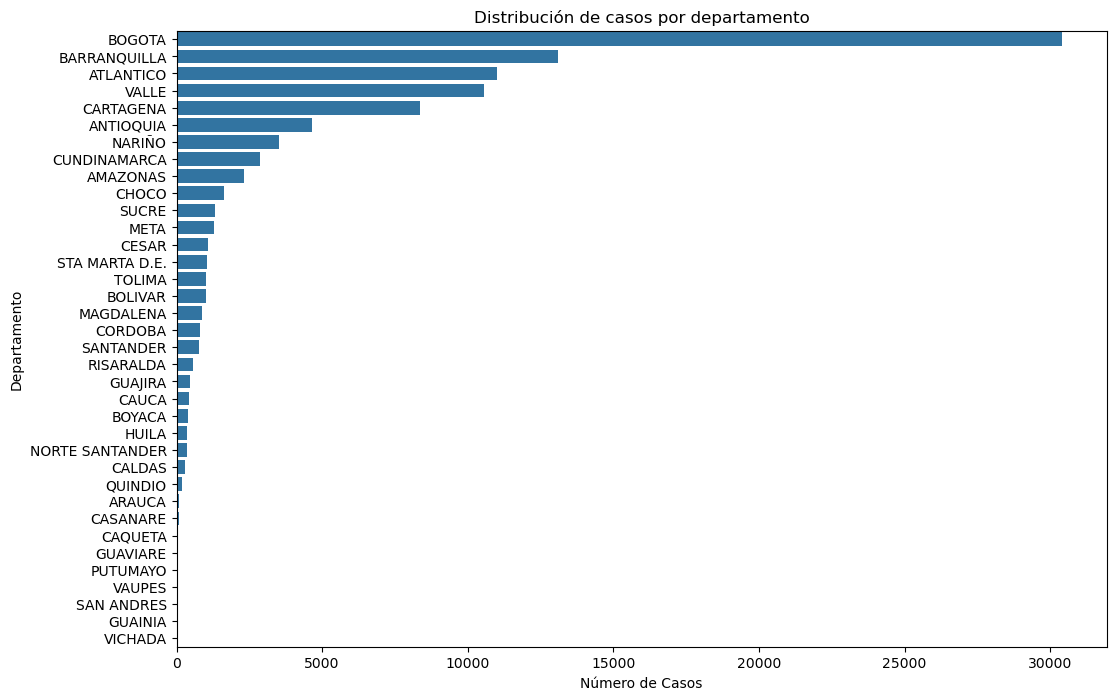

In [32]:
casos_por_departamento = df['nombre_departamento'].value_counts().reset_index()
casos_por_departamento.columns = ['Nombre_departamento', 'Número_de_casos']

# Crear el gráfico
plt.figure(figsize=(12,8))
sns.barplot(x='Número_de_casos', y='Nombre_departamento', data=casos_por_departamento)
plt.title('Distribución de casos por departamento')
plt.xlabel('Número de Casos')
plt.ylabel('Departamento')
plt.show()


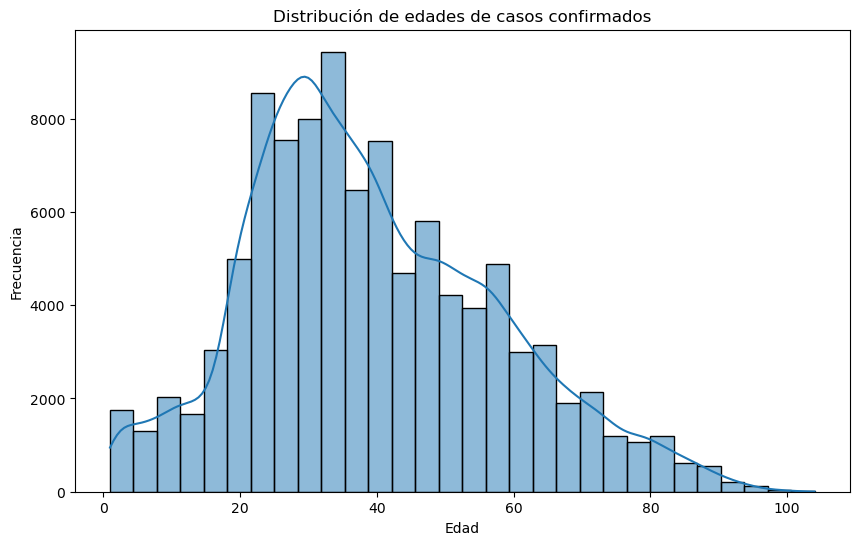

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df['edad'], bins=30, kde=True)
plt.title('Distribución de edades de casos confirmados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()



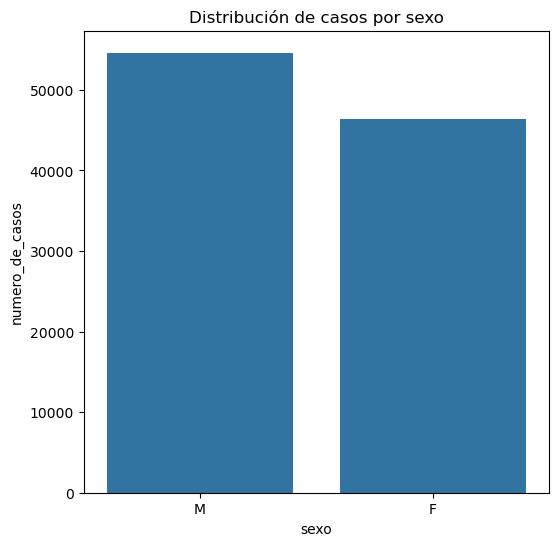

In [35]:
casos_por_sexo = df['sexo'].value_counts().reset_index()
casos_por_sexo.columns = ['sexo', 'numero_de_casos']

plt.figure(figsize=(6,6))
sns.barplot(x='sexo', y='numero_de_casos', data=casos_por_sexo)
plt.title('Distribución de casos por sexo')
plt.show()


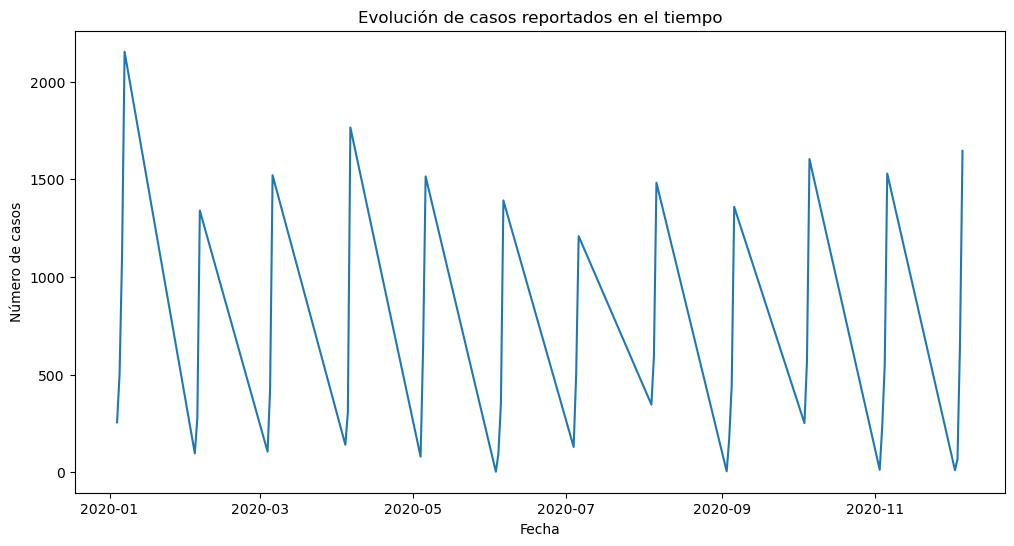

In [36]:
df['fecha_reporte_web'] = pd.to_datetime(df['fecha_reporte_web'])
casos_por_fecha = df.groupby('fecha_reporte_web').size().reset_index(name='numero_de_casos')

plt.figure(figsize=(12,6))
sns.lineplot(x='fecha_reporte_web', y='numero_de_casos', data=casos_por_fecha)
plt.title('Evolución de casos reportados en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.show()


In [46]:
print(df_ml.columns)



Index(['edad', 'sexo_M', 'estado_Leve', 'estado_N/A',
       'tipo_contagio_En estudio', 'tipo_contagio_Importado',
       'tipo_contagio_Relacionado'],
      dtype='object')


In [47]:

df_ml['estado_recuperado'] = (df_ml['estado_Leve'] == 1).astype(int)


In [48]:
print(df_ml['estado_recuperado'].value_counts())


1    95315
0     5685
Name: estado_recuperado, dtype: int64


In [49]:
X = df_ml.drop('estado_recuperado', axis=1)
y = df_ml['estado_recuperado']


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")


Conjunto de entrenamiento: (80800, 7)
Conjunto de prueba: (20200, 7)


In [52]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [53]:
y_pred = model.predict(X_test)


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1129
           1       1.00      1.00      1.00     19071

    accuracy                           1.00     20200
   macro avg       1.00      1.00      1.00     20200
weighted avg       1.00      1.00      1.00     20200



In [58]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)




                     Feature  Importance
2                estado_Leve    0.858116
0                       edad    0.075590
3                 estado_N/A    0.059947
6  tipo_contagio_Relacionado    0.004920
1                     sexo_M    0.000941
4   tipo_contagio_En estudio    0.000264
5    tipo_contagio_Importado    0.000222


In [59]:
# Remover estado_Leve de las características
X_reduced = X.drop('estado_Leve', axis=1)

# Reentrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
model_reduced.fit(X_train, y_train)

# Evaluar el modelo
y_pred_reduced = model_reduced.predict(X_test)
print(classification_report(y_test, y_pred_reduced))


              precision    recall  f1-score   support

           0       0.78      0.29      0.42      1129
           1       0.96      1.00      0.98     19071

    accuracy                           0.96     20200
   macro avg       0.87      0.64      0.70     20200
weighted avg       0.95      0.96      0.95     20200



In [61]:

import joblib

# Guardar el modelo en un archivo
joblib.dump(model, 'modelo_covid.pkl')


['modelo_covid.pkl']

In [64]:
import boto3

bucket_name = 'p3-tet'
s3_key = 'refined/modelo_covid.pkl'

s3 = boto3.client('s3')
s3.upload_file('modelo_covid.pkl', bucket_name, s3_key)


In [68]:
from io import StringIO

refined_bucket = 'p3-tet'  # Reemplaza con el nombre de tu bucket
refined_prefix = 'refined/analysis_results/'

csv_buffer = StringIO()
df.to_csv(csv_buffer, index=False)

s3_resource = boto3.resource('s3')
s3_resource.Object(refined_bucket, f'{refined_prefix}analisis_covid.csv').put(Body=csv_buffer.getvalue())


{'ResponseMetadata': {'RequestId': 'EP8VE3YXPN08QX2S',
  'HostId': 'v+IFzBaUU1v4NnQy9nXkfTln5fg0h0rgvBMfC+Bdz8fhThjX1PBC2tafDGor1eCED8/uat31+Jc=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'v+IFzBaUU1v4NnQy9nXkfTln5fg0h0rgvBMfC+Bdz8fhThjX1PBC2tafDGor1eCED8/uat31+Jc=',
   'x-amz-request-id': 'EP8VE3YXPN08QX2S',
   'date': 'Sun, 24 Nov 2024 11:22:16 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"100e3c01bcd094c4c2c6212da217ff7b"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"100e3c01bcd094c4c2c6212da217ff7b"',
 'ServerSideEncryption': 'AES256'}